In [77]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from random import shuffle
from sklearn.metrics import accuracy_score
from skimage.feature import local_binary_pattern as lbp
from skimage.feature import hog 
import os
import joblib
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



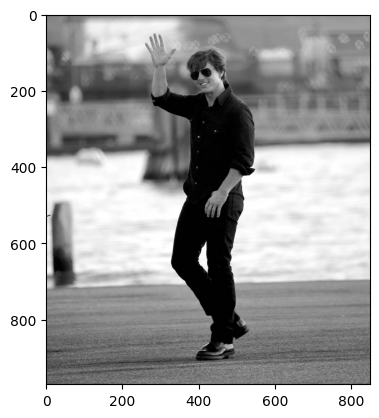

In [78]:
img = cv.imread('image.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

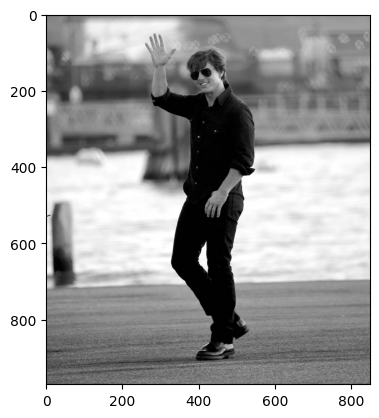

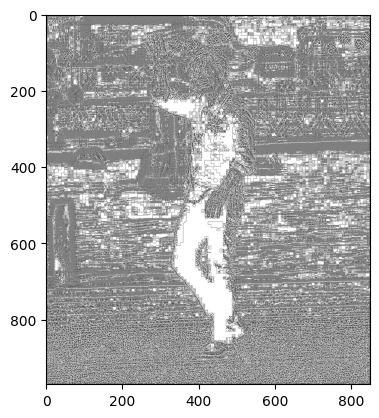

(array([0.00200965, 0.00046847, 0.00059799, 0.00065673, 0.00309381,
        0.00191755, 0.00430538, 0.00582315, 0.01588623, 0.00493696,
        0.00192764, 0.00299155, 0.0007099 , 0.00081976, 0.0005266 ,
        0.01534412]),
 array([  0.   ,  16.125,  32.25 ,  48.375,  64.5  ,  80.625,  96.75 ,
        112.875, 129.   , 145.125, 161.25 , 177.375, 193.5  , 209.625,
        225.75 , 241.875, 258.   ]),
 <BarContainer object of 16 artists>)

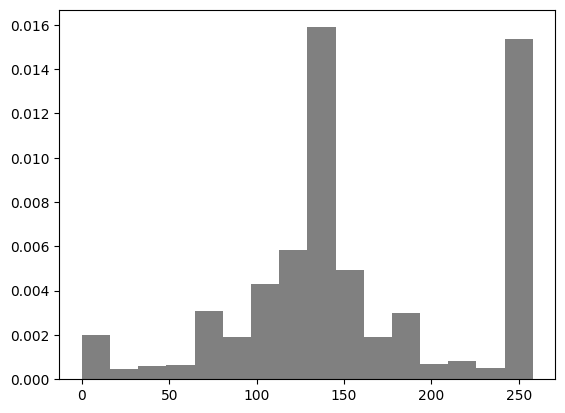

In [79]:
radius = 1
n_adj = 8*radius
n_points = 2**n_adj
lbp_img = lbp(img, n_points, radius, 'uniform')
plt.imshow(img,cmap=plt.cm.gray)
plt.show()
plt.imshow(lbp_img,cmap=plt.cm.gray)
plt.show()
bins = int(lbp_img.max() + 1)
plt.hist(lbp_img.ravel(), density=True, bins=16, range=(0, bins), facecolor='0.5')

توزیع هیستوگرام بیشتر در نواحی میانی متمرکز است که لبه ها را مشخص میکند و به دلیل این است رشته های که اکثرا شامل 1 یا شامل 0 هستند کمتر می باشد. بین های ابتدایی و انتهایی نیز نواحی یکنواخت را نشان می دهد. و نواحی بین این دو یعنی بین ابتدا و نقاط میانی ، انتها و نقاط میانی گوشه ها را مشخص می کند که تعداد انها ناچیز است. همچنین با افزایش نقاط همسایگی هم  بیت ها و تعداد بین های هیستوگرام زیاد می شود ولی کلیت توزیع و رفتارش همان است

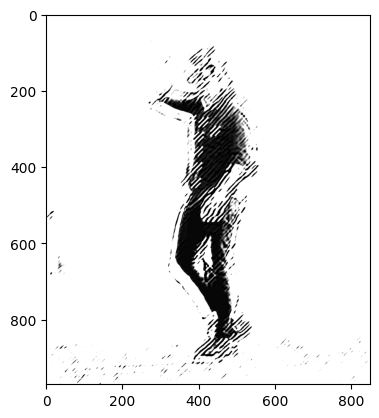

In [80]:
gabor_filter = cv.getGaborKernel(ksize = (25,25), sigma=6, theta = np.pi*1/4, lambd=8 , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
plt.imshow(img_gabor, cmap = plt.cm.gray)

#plt.imshow(gabor_filter, cmap = plt.cm.gray)
#plt.show()

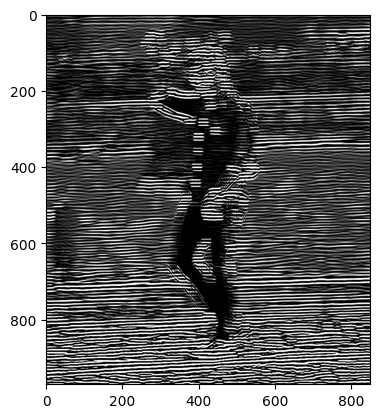

In [81]:
gabor_filter = cv.getGaborKernel(ksize = (25,25), sigma=6, theta = np.pi*2/4, lambd=8 , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
plt.imshow(img_gabor, cmap = plt.cm.gray)

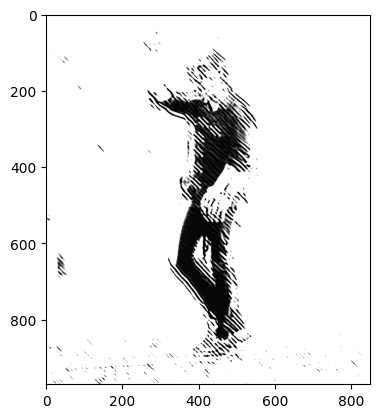

In [82]:
gabor_filter = cv.getGaborKernel(ksize = (25,25), sigma=6, theta = np.pi*3/4, lambd=8 , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
plt.imshow(img_gabor, cmap = plt.cm.gray)

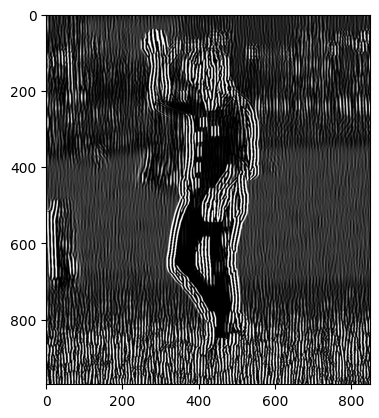

In [83]:
gabor_filter = cv.getGaborKernel(ksize = (25,25), sigma=6, theta = np.pi*4/4, lambd=8 , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
plt.imshow(img_gabor, cmap = plt.cm.gray)

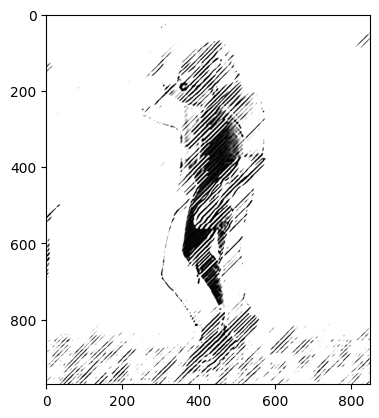

In [84]:

gabor_filter = cv.getGaborKernel(ksize = (60,60), sigma=6, theta = np.pi*1/4, lambd=8 , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
plt.imshow(img_gabor, cmap = plt.cm.gray)

در بالا فیلتر گابور را با پارامتر های یکسان به جز زاویه مشاهده می کنیم که بهترین فیچر اکسترکشن را در زاوایای 45 و 135 درجه مشاهده میکنیم
که علت نحوه قرار گرفتن شخص نسبت به محیط بکگراند او میباشد در زیر نیز سایر پارامتر هارا تعویض میکنیم و اثر انهارا مشاهده میکنیم.

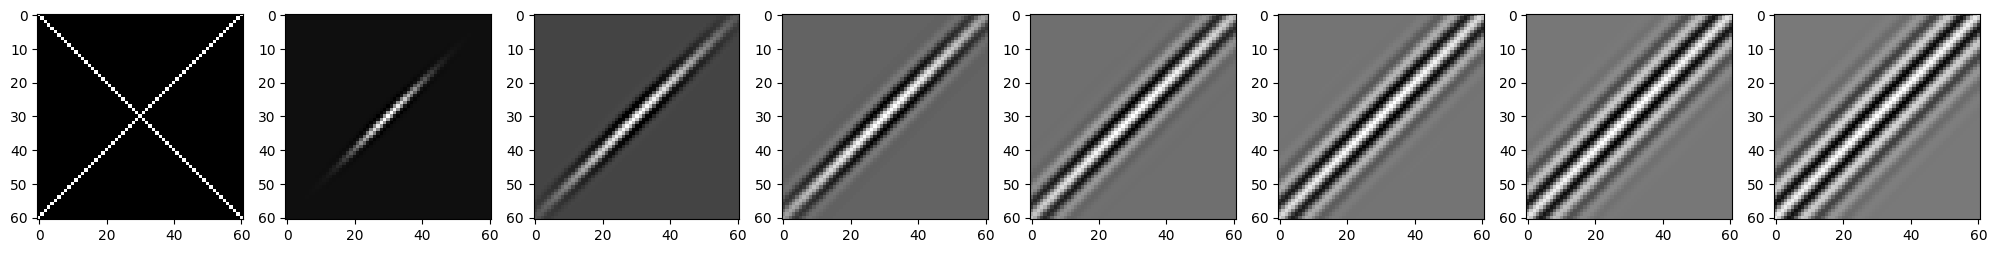

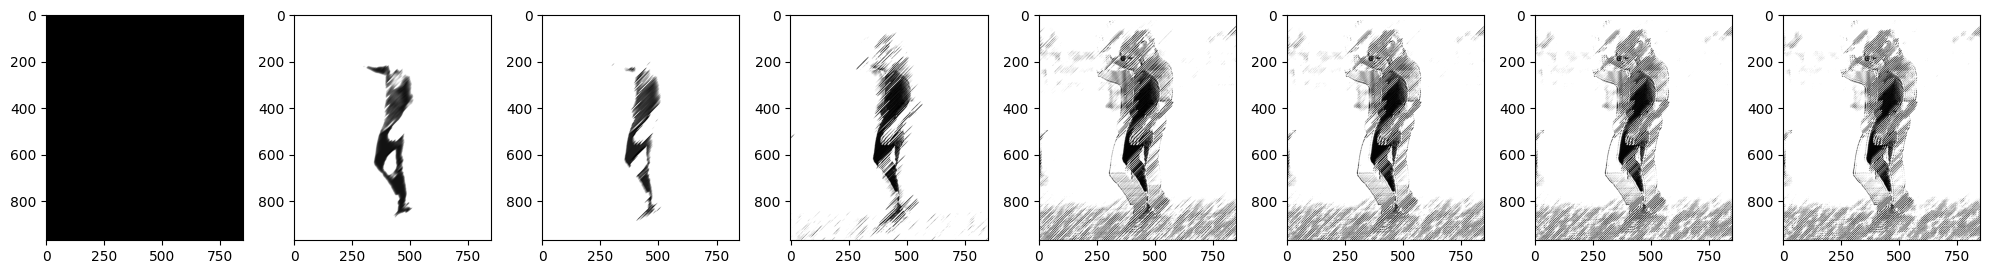

In [85]:
l = 6
fig, axes = plt.subplots(1, 8, figsize=(20, 20))
ax = axes.ravel()
for i in range(8):
    gabor_filter = cv.getGaborKernel(ksize = (60,60), sigma=i, theta = np.pi*1/4, lambd=l , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
    img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
    ax[i].imshow(gabor_filter, cmap = plt.cm.gray)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 8, figsize=(20, 20))
ax = axes.ravel()
for i in range(8):
    gabor_filter = cv.getGaborKernel(ksize = (60,60), sigma=i, theta = np.pi*1/4, lambd=l , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
    img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
    ax[i].imshow(img_gabor, cmap = plt.cm.gray)
fig.tight_layout()
plt.show()

ابتدا با لاندای یکسان، سیگما را تغییر دادیم. سیگما در واقع سایز کلی فیلتر را تغییر می دهد و نوارهای بیشتری را شامل میشود. در اصل سیگما مقدار انحراف پوش گوسی میباشد.
بهترین مقدار آن برای کیس ما حدود 2 3 میباشد

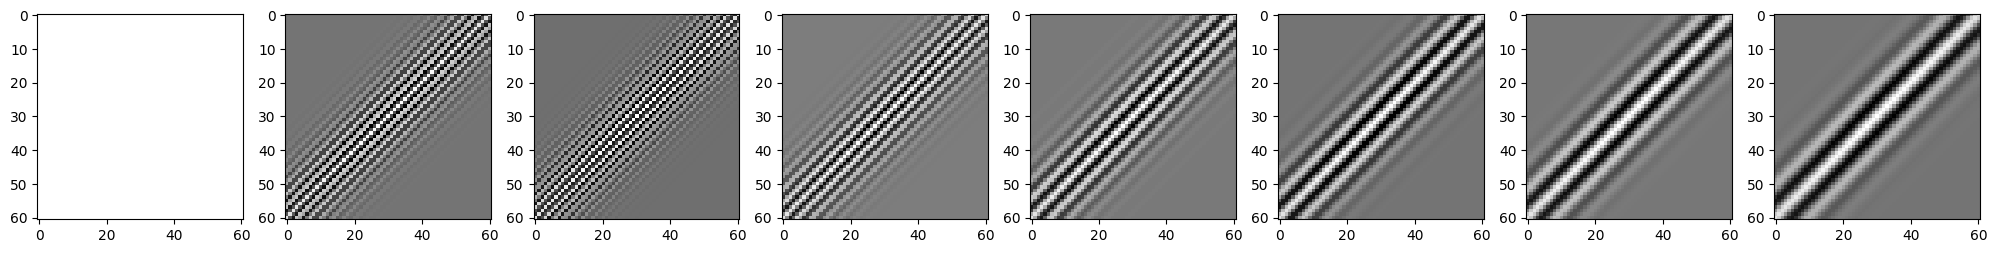

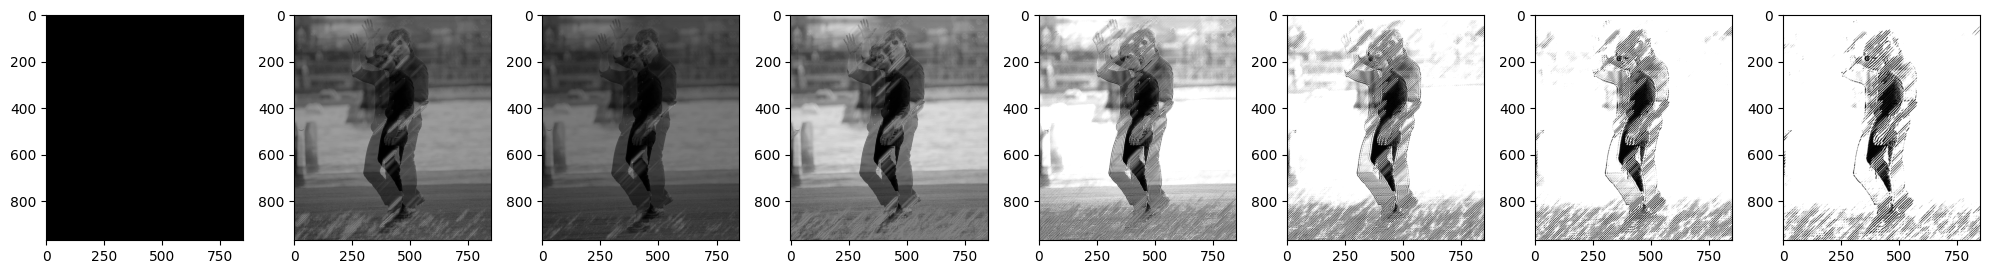

In [86]:
s = 6
fig, axes = plt.subplots(1, 8, figsize=(20, 20))
ax = axes.ravel()
for i in range(8):
    gabor_filter = cv.getGaborKernel(ksize = (60,60), sigma=s, theta = np.pi*1/4, lambd=i , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
    img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
    ax[i].imshow(gabor_filter, cmap = plt.cm.gray)
fig.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 8, figsize=(20, 20))
ax = axes.ravel()
for i in range(8):
    gabor_filter = cv.getGaborKernel(ksize = (60,60), sigma=s, theta = np.pi*1/4, lambd=i , gamma=0.1 , psi=0 , ktype=cv.CV_32F)
    img_gabor = cv.filter2D(img, cv.CV_8UC3, gabor_filter)
    ax[i].imshow(img_gabor, cmap = plt.cm.gray)
fig.tight_layout()
plt.show()

 حال با سیگمای یکسان ، لاندا را تغییر میدهیم. لاندای کم نوارهای نازک تر و بیشتری میسازد و هر چه لاندا را افزایش دهیم، نوارها کلفت تر و تعدادشان کم تر میشود. در واقع این پارامتر طول موج جز سینوسی میباشد.

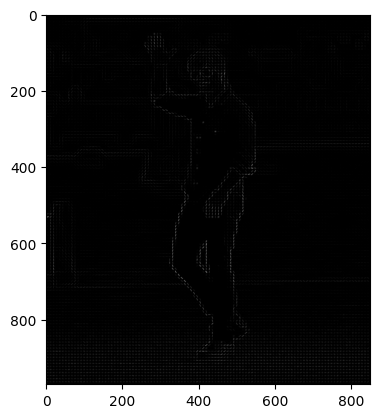

In [87]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.show()

در بالا با دستور هوگ با کمی دقت می بینیم که در خروجی هاله ای سفید دور شخص مشخص است که او را جدا کرده است

In [88]:
data_h = []
person_number = []
current_path = r"C:\Users\SURFACEPRO3_\Documents\cvl\happy"
counter = 0
for file in os.listdir(current_path):
    if file[-3:] in {'png'}:
        person_number.append(file[1:4])
        im = imread(current_path+'/'+file, as_gray=True)
        im_crop = im[230:450,50:250]
        data_h.append(im_crop)
        counter = counter + 1
happycounter = counter
width,height = np.shape(im_crop)
im_matrix_h = np.zeros((width*height,counter))
for i in range(counter):
    im_matrix_h[:,i] = np.reshape(data_h[i],(width*height,))
                    

data_d = []
person_number = []
current_path = r"C:\Users\SURFACEPRO3_\Documents\cvl\disgust"
counter = 0
for file in os.listdir(current_path):
                if file[-3:] in {'png'}:
                    person_number.append(file[1:4])
                    im = imread(current_path+'/'+file, as_gray=True)
                    im_crop = im[230:450,50:250]
                    data_d.append(im_crop)
                    counter = counter + 1
disgustcounter = counter
im_matrix_d = np.zeros((width*height,counter))
for i in range(counter):
    im_matrix_d[:,i] = np.reshape(data_d[i],(width*height,))

In [89]:
happy_index = np.array(list(range(happycounter)))
shuffle(happy_index)

disgust_index = np.array(list(range(disgustcounter)))
shuffle(disgust_index)

In [90]:
train_img = np.zeros((width*height,100))
ytrain = np.zeros((100,))

train_img[:,0:65] =  im_matrix_h[:,happy_index[0:65]]
train_img[:,65:100] =  im_matrix_d[:,disgust_index[0:35]]

ytrain[65:100] = 1

test_img = np.zeros((width*height,happycounter+disgustcounter - (100)))
ytest = np.zeros((happycounter+disgustcounter - (100),))

test_img[:,0:happycounter - 65] = im_matrix_h[:,happy_index[65:happycounter]]
test_img[:,happycounter - 65:happycounter - 65 + disgustcounter - 35] = im_matrix_d[:,disgust_index[35:disgustcounter]]
ytest[happycounter - 65:happycounter - 65 + disgustcounter - 35]   = 1


در بلوک های بالا  تصاویر حالات خوشحال و انزجار را خوانده و مانند آزهای قبلی ماسک می کنیم و در ماتریس هایی ذخیره میکنیم
سپس داده ها شافل شده و در بلوک بعدی اش 65 تا از دسته خوشحال و 35 تا از دسته انزجار به عنوان داده اموزش و بقیه به عنوان تست انتخاب شده اند

In [91]:
tmp = train_img[:,1]
size1, = np.shape(hog(tmp.reshape(width,height) , orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2)))
print(size1)

19968


In [92]:
X_train = np.zeros((size1,100))
X_test = np.zeros((size1,happycounter+disgustcounter - 100))

for i in range(100):
    
    tmp = train_img[:,i]
    X_train[:,i] = hog(tmp.reshape(width,height) , orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    
    
for i in range(happycounter+disgustcounter - 100):
    
    tmp = test_img[:,i]
    X_test[:,i] = hog(tmp.reshape(width,height) , orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    

In [93]:
C_vector = np.array([5000,1000,500,200,100,10,1,2,0.1,0.01])
acc_vector = np.zeros((10,))
X = X_train

counter = 0
y = ytrain
for i in C_vector:
    k_fold = KFold(n_splits=5,shuffle = True)
    score = 0
    
    for train_index, test_index in k_fold.split(ytrain):
        model = (svm.SVC(C = i, kernel = 'linear'))
        Xt = X[:,train_index]
        y_t = y[train_index]
        Xtest = X[:,test_index]
        y_test = y[test_index]
        
        
        model.fit(Xt.T,y_t)
        predict = model.predict(Xtest.T)
        score = score + accuracy_score(y_test,predict)
        
    acc_vector[counter] = score/5
    counter = counter + 1
    
    
index  = np.where(np.max(acc_vector) == acc_vector)
C_chosen = C_vector[index]
C_chosen = C_chosen[0]

In [94]:
C_chosen

5000.0

در بالا با توجه به سایز محاسبه شده ابتدا داده های اموزش و تست تمام صفر را تعریف کرده و
سپس داخل حلقه ها برای تک تک آنها با دستور هوگ ویژگی ها را حساب کرده و ذخیره می کنیم
سپس برای تعیین مناسب پارامتر سی در طبقه بند ماشین بردار پشتیبان از کا فولد کراس ولیدیشن استفاده کرده و
در هر فولد با داده های اموزش مدل را اموزش داده و روی داده های تست هم پیش بینی انجام داده و با توجه به نتایج بهترین مقدار پارامتر سی انتخاب می شود
سپس با بهترین مقدار انتخاب شده برای پارامتر سی مدل را اموزش داده و پردیکشن را روی تست انجام می دهیم که دقت های بسیار خوب نشان می دهد ویژگی ها و مدل ما مناسب هستند

In [95]:
Model = svm.SVC(C = C_chosen, kernel = 'linear').fit(X_train.T, ytrain)
predict = Model.predict(X_test.T) 

print("Training Score:",Model.score(X_train.T, ytrain))
print("Test Score:", Model.score(X_test.T, ytest))
print("Precision:",precision_score(ytest, predict, average='weighted'))
print("Recall:",recall_score(ytest,predict,average='weighted'))
print("F1 Score:",f1_score(ytest, predict, average='macro'))


Training Score: 1.0
Test Score: 0.96875
Precision: 0.9702380952380952
Recall: 0.96875
F1 Score: 0.9660657476139979


In [96]:
confusion_matrix(ytest , predict)

array([[20,  0],
       [ 1, 11]], dtype=int64)